# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [47]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [16]:
df = pd.read_csv("cardio.csv", sep=";")

In [17]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [19]:
df.shape

(70000, 13)

In [20]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

In [22]:
df = df[df["ap_lo"] < 110]


In [23]:
df = df[df["ap_lo"] > 60]

⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [24]:
df = df.sample(n= 500)

In [25]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,50096.130000,19328.624000,1.390000,164.624000,74.453340,126.288000,81.772000,1.296000,1.190000,0.106000,0.054000,0.828000,0.468000
std,29221.112816,2546.863771,0.488238,9.693428,13.909639,14.031922,7.314576,0.620608,0.535232,0.308146,0.226244,0.377758,0.499475
min,27.000000,14326.000000,1.000000,64.000000,42.000000,99.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24522.250000,17566.500000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50721.500000,19645.500000,1.000000,165.000000,72.500000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74684.750000,21320.750000,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99952.000000,23595.000000,2.000000,189.000000,131.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [26]:
df.ap_hi.mean()

126.288

⭐What is the standard deviation for Systolic blood pressure?

In [27]:
df.ap_hi.std()

14.031922380464584

⭐What is the standard error of the mean for Systolic blood pressure?

In [28]:
df.ap_hi.sem()

0.6275266459543896

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [48]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.25389069228832, 127.32210930771167)

In [49]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(125.0550799550655, 127.5209200449345)

In [50]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.6653932549321, 127.9106067450679)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [51]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=6.833175973712618, pvalue=2.4283493840106992e-11)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [52]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,305.0,125.914754,14.139552,100.0,120.0,120.0,140.0,160.0
2,195.0,126.871795,13.877928,99.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [53]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.003, p=0.959
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [55]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-0.7435339714930443, pvalue=0.45750909883202606)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

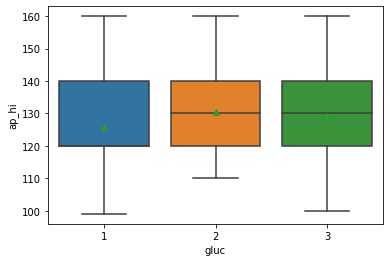

In [56]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True)

In [58]:
showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

IndentationError: unexpected indent (3275139940.py, line 2)

⭐Show the descriptive statistics of 3 groups.

In [59]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,438.0,125.808219,14.031991,99.0,120.0,120.0,140.0,160.0
2,29.0,130.344828,12.672456,110.0,120.0,130.0,140.0,160.0
3,33.0,129.090909,14.655126,100.0,120.0,130.0,140.0,160.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [60]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==1]["ap_hi"])

F_onewayResult(statistic=1.4575450835819442e-44, pvalue=1.0)

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [65]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [66]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [68]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   4.5366   0.21 -1.7738 10.8471  False
     1      3   3.2827 0.3964 -2.6582  9.2236  False
     2      3  -1.2539  0.934 -9.6307  7.1229  False
----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [ ]:
#H0: the two categorical veriables are independent
#H1: the two categorical veriables are pendent

In [69]:
pd.crosstab(df.active, df.cardio)

cardio,0,1
active,,
0,41,45
1,225,189


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 31481 to 12679
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 54.7 KB


In [75]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,41,45
1,225,189


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [76]:
stats.chi2_contingency(ct)

(1.0197653196074443,
 0.3125746824599427,
 1,
 array([[ 45.752,  40.248],
        [220.248, 193.752]]))

In [77]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [78]:
chi, p, dof, expected = stats.chi2_contingency(ct)
print("test statistic", chi)
print("p-value", p)

test statistic 1.0197653196074443
p-value 0.3125746824599427


In [ ]:
⭐Conduct chi-square test to see if there is a relationship between 2 kolostrol kardio

In [79]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,225,171
2,28,32
3,13,31


In [80]:
stats.chi2_contingency(ct)

(12.999184051815636,
 0.0015040526823528536,
 2,
 array([[210.672, 185.328],
        [ 31.92 ,  28.08 ],
        [ 23.408,  20.592]]))

In [ ]:
chi, p, dof, expected = stats.chi2_contingency(ct)   #  2 kare testi yaptık...kolostrol/kardio arasında anlamlı ilişki var

In [81]:
chi, p, dof, expected = stats.chi2_contingency(ct)
print("test statistic", chi)
print("p-value", p)

test statistic 12.999184051815636
p-value 0.0015040526823528536
